# Regression (Ch. 14)



In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 



In [3]:
# example 14.1, Sample Statistics 

ydata = np.array([6.495, 6.595, 6.615, 6.635, 6.485, 6.555, 6.665, 6.505, 6.435, 6.625, 6.715, 6.655, 6.755, 6.625, 6.715, 6.575, 6.655, 6.605, 6.565, 6.515, 6.555, 6.395, 6.775, 6.685 ])

print(ydata)

[6.495 6.595 6.615 6.635 6.485 6.555 6.665 6.505 6.435 6.625 6.715 6.655
 6.755 6.625 6.715 6.575 6.655 6.605 6.565 6.515 6.555 6.395 6.775 6.685]


In [4]:
# mean value
ymean = np.mean(ydata)
print('mean of y = ', np.mean(ydata))

ndata = len(ydata)
print('# of ydata = ',ndata )

print('sum of y = ', np.sum(ydata))
ybar = np.sum(ydata)/ndata
print('mean of y = ', ybar)


mean of y =  6.6000000000000005
# of ydata =  24
sum of y =  158.4
mean of y =  6.6000000000000005


In [5]:
# median 
# ndata = 24, even number -> average of items 12,13 from the sorted data 
ydata.sort()
print(ydata)
ytilde = np.sum(ydata[11:13])/2
ytilde2 = np.mean(ydata[11:13])
print('median = ', ytilde, ytilde2)

[6.395 6.435 6.485 6.495 6.505 6.515 6.555 6.555 6.565 6.575 6.595 6.605
 6.615 6.625 6.625 6.635 6.655 6.655 6.665 6.685 6.715 6.715 6.755 6.775]
median =  6.61 6.61


In [6]:
# SST: the total (corrected) sum of squares
SST = np.sum((ydata - ybar)**2.)
print('SST = ', SST)

SST =  0.2170000000000003


In [7]:
# estimated variance (sample variance)
# Given n data, we compute SST by using the mean.
# Thus we normalize SST by (n-1). 
sy2 = SST/(ndata - 1)
print('estimated variance =', sy2)

# estimated standard deviation
sy = np.sqrt(sy2)
print('estimated standard deviation = ', sy)

# the coefficient of variation
# =the ratio of the sample standard deviation to the sample mean estimate
print('coefficient of variation = ', sy/ ybar * 100)

estimated variance = 0.009434782608695666
estimated standard deviation =  0.09713280912593678
coefficient of variation =  1.47170922918086


In [8]:
# Median Absolute Deviation (MAD)
print(ydata - ytilde)
yy = np.abs(ydata - ytilde)
print(yy)
yy.sort()
print(yy)
MAD = np.mean(yy[11:13])/0.6745
print('MAD = ', MAD)

import scipy as sc 
MADsc = sc.stats.median_abs_deviation(ydata,scale='normal')
print('MAD (sc) = ', MADsc)

[-0.215 -0.175 -0.125 -0.115 -0.105 -0.095 -0.055 -0.055 -0.045 -0.035
 -0.015 -0.005  0.005  0.015  0.015  0.025  0.045  0.045  0.055  0.075
  0.105  0.105  0.145  0.165]
[0.215 0.175 0.125 0.115 0.105 0.095 0.055 0.055 0.045 0.035 0.015 0.005
 0.005 0.015 0.015 0.025 0.045 0.045 0.055 0.075 0.105 0.105 0.145 0.165]
[0.005 0.005 0.015 0.015 0.015 0.025 0.035 0.045 0.045 0.045 0.055 0.055
 0.055 0.075 0.095 0.105 0.105 0.105 0.115 0.125 0.145 0.165 0.175 0.215]
MAD =  0.0815418828762055
MAD (sc) =  0.081543122017809


In [9]:
# histogram 
hist, bin_edges = np.histogram(ydata, bins=8, range=[6.39,6.79])
print('hist = ', hist)
print('bin boundaries = ', bin_edges)


hist =  [2 1 3 4 6 4 2 2]
bin boundaries =  [6.39 6.44 6.49 6.54 6.59 6.64 6.69 6.74 6.79]


bin_width =  0.04999999999999982
8
bin_center =  [6.415 6.465 6.515 6.565 6.615 6.665 6.715 6.765]


<BarContainer object of 8 artists>

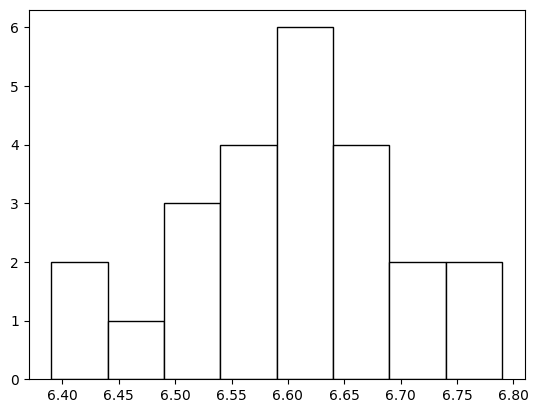

In [10]:
# create a bar chart 
bin_width = bin_edges[1] - bin_edges[0]
print('bin_width = ', bin_width)
nhist = len(hist)
print(nhist)
bin_center = (bin_edges[1:] + bin_edges[0:-1])/2
print('bin_center = ', bin_center)

plt.bar(bin_center, hist, width=bin_width, color='w', edgecolor='k')

In [11]:
# scaling PDF
# sum of the histogram should be 1 
# From P (y in [y_i,y_i+dy]) = n_i / n, 
# define empirical density f_i = P/dy 
# A probability density function (PDF) is the continuous version of the histogram with densities
# To match n_i with PDF, we multply (n*dy) to PDF. 

sample mean = 6.6000000000000005
biased sample std =  0.09508767883730615


(array([2., 1., 3., 4., 6., 4., 2., 2.]),
 array([6.39, 6.44, 6.49, 6.54, 6.59, 6.64, 6.69, 6.74, 6.79]),
 <BarContainer object of 8 artists>)

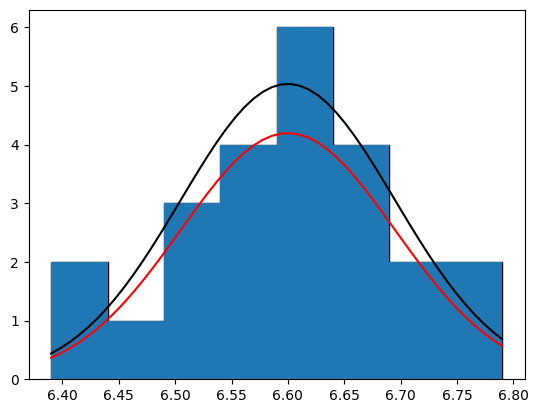

In [12]:
# add normal distribution
print('sample mean =', ybar)
# np.sqrt(SST/(ndata - 1)) # corrected standard deviation (=unbiased sample variance)
# np.sqrt(SST/(ndata)) # uncorrected standard deviation (=biased sample variance)
ystd = np.std(ydata)
print('biased sample std = ', ystd) # uncorrected standard deviation (=biased sample variance)
x = np.linspace( 6.39, 6.79)
y = sc.stats.norm.pdf(x,ybar,ystd)
plt.plot(x,y*ndata*bin_width,color='k') # scaled PDF
plt.bar(bin_center, hist, width=bin_width, color='w', edgecolor='k')
plt.plot(x,y,color='r') # unscaled PDF
plt.hist(ydata,bins=8,range=[6.39,6.79])

## Random numbers and simulation

$$ f(x) = \frac{1}{b-a} $$
where $ a \le x \le b$

In [17]:
a = 1.
b = 0.
n = 11

xval = np.random.uniform(a,b,n)
print(xval)

[0.46370446 0.6426297  0.81005346 0.85947802 0.73241341 0.58807499
 0.69570979 0.50499183 0.04015052 0.68415921 0.7731525 ]


In [20]:
n=1000
xval = np.random.uniform(a,b,n)


In [23]:
print(np.max(xval))
print(np.min(xval))

0.9995622274274348
2.384531457222394e-05


(array([ 92.,  97.,  99.,  96., 103., 100., 113.,  86.,  83., 131.]),
 array([2.38453146e-05, 9.99776835e-02, 1.99931522e-01, 2.99885360e-01,
        3.99839198e-01, 4.99793036e-01, 5.99746875e-01, 6.99700713e-01,
        7.99654551e-01, 8.99608389e-01, 9.99562227e-01]),
 <BarContainer object of 10 artists>)

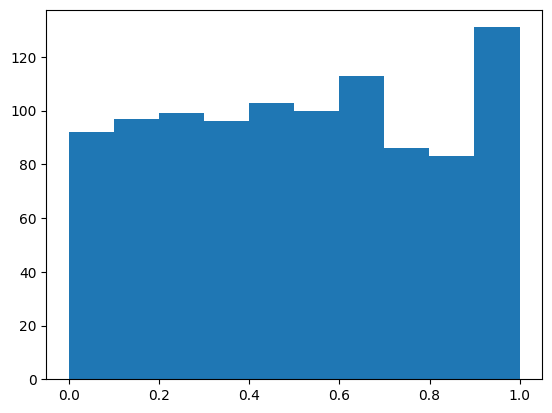

In [25]:
plt.hist(xval,bins=10)

(array([  7.,  20.,  80., 161., 211., 209., 175.,  89.,  39.,   9.]),
 array([0.47083443, 0.47660301, 0.48237158, 0.48814015, 0.49390872,
        0.4996773 , 0.50544587, 0.51121444, 0.51698301, 0.52275159,
        0.52852016]),
 <BarContainer object of 10 artists>)

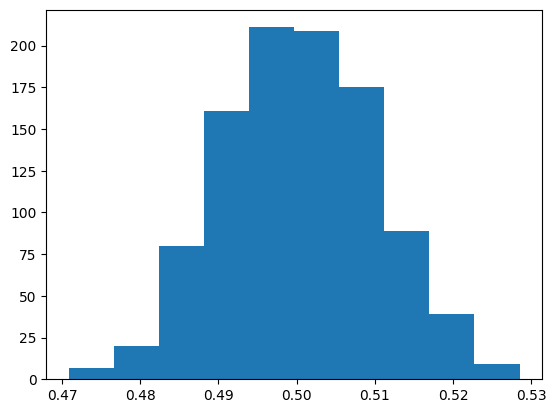

In [26]:
n=1000
mu = 0.5
std = 0.01
xval = np.random.normal(mu,std,n)

plt.hist(xval,bins=10)


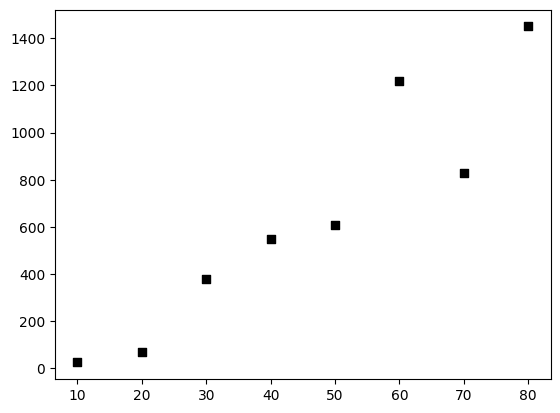

In [34]:
# - - - - - 
# ex14.5 
# - - - - - 

xi = np.linspace(1,8,8)*10
yi = np.array([25,70, 380, 550, 610, 1220, 830, 1450],dtype=float)
plt.scatter(xi,yi,c='k',marker='s')


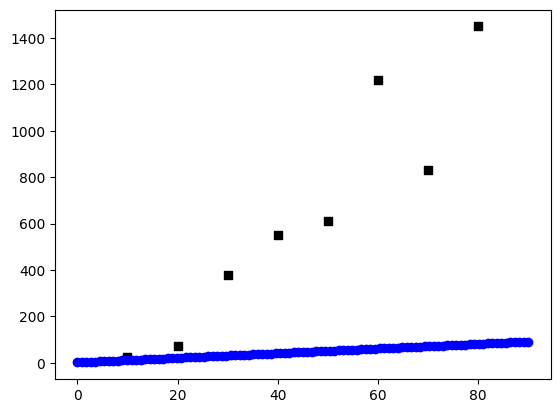

In [40]:
# Find a0 and a1 for yhat = a0 + a1*xhat
a0 = 1.
a1 = 1.
xhat = np.linspace(0,90,101)
yhat = a0 + a1 * xhat

plt.scatter(xi,yi,c='k',marker='s')
plt.scatter(xhat,yhat,c='b')
